In [19]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Data Exploration Phase

In [2]:
# Read in dataset
telco = pd.read_csv('telco_churn.csv', index_col = "Unnamed: 0")
pd.set_option('display.max_columns', None)

In [3]:
# Print header
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [100]:
# Print header
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [101]:
# Observation 1: We have a customer ID column that we need to drop
# Observation 2: Depending on whether there is an effect or not - we may drop othere column as well
# Observation 3: Since ML Algorithms do not read in language, we will have to convert this info to numeric and we'll find out how

In [102]:
# Print info
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(1), ob

In [ ]:
# Observation 4: TotalCharges needs to become numeric

In [103]:
# Take a look at unique values in telco
telco.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        4
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [79]:
# Observation 5: Internet Service has 4 values whereas it should be 3

In [104]:
# Unique values of internet service
telco['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No', 'dsl'], dtype=object)

In [ ]:
# Observation 5: "dsl" neeeds to be collapsed to "DSL"

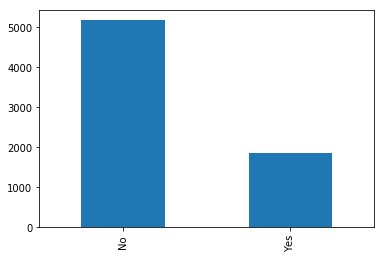

In [105]:
# Find the null model
telco['Churn'].value_counts().plot(kind='bar')

In [106]:
# Find the null model
telco['Churn'].value_counts() / telco.shape[0]

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

## 2. Data Cleaning 

In [ ]:
# Drop unecessary columns 
# Observation 1: We have a customer ID column that we need to drop
# Observation 2: Depending on whether there is an effect or not - we may drop othere column as well
# Observation 3: Since ML Algorithms do not read in language, we will have to convert this info to numeric and we'll find out how

In [3]:
# Task 1: Drop customer ID column
telco.drop('customerID', axis = 1, inplace = True)

In [4]:
# Task 2: Convert total charges to numeric
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], 
                                      errors = 'coerce')

In [94]:
# Print info
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(1), object(17)
memory usage: 1.1+ MB


In [9]:
# Print # of missing values
telco.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

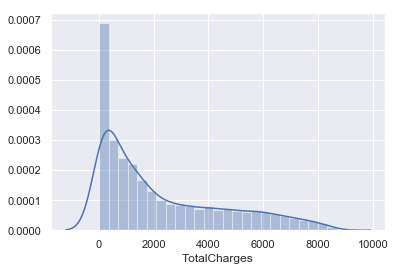

In [43]:
# Deal with missing values -- let's replace missing values with a central measure
plt.rcParams["axes.labelsize"] = 1
sns.set(font_scale=1) 

sns.distplot(telco['TotalCharges'].dropna())

In [44]:
# Check out distributions in more detail
telco['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [5]:
# Settle on median 
telco.loc[telco['TotalCharges'].isna(), 'TotalCharges'] = telco['TotalCharges'].median()

In [159]:
# Make sure no more 
telco['TotalCharges'].isna().sum()

0

In [6]:
# Collapse 'dsl' into 'DSL'
telco['InternetService'] = telco['InternetService'].replace({'dsl':"DSL"})
telco['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

## 3. Exploratory Analysis for Machine Learning

In [ ]:
## 1) Understand relationship between features and target

In [ ]:
## step 1: Divide features into categorical, numeric, and more

In [21]:
# Grab a look at the header
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# Get all features, categorical features, and numeric features
features = [column_name for column_name in telco.columns if column_name != 'Churn']

categorical = [column_name for column_name in features if telco[column_name].dtype == 'object']


numeric = [column_name for column_name in features if column_name not in categorical]

In [49]:
# Print them out and make sure
numeric

['tenure', 'MonthlyCharges', 'TotalCharges']

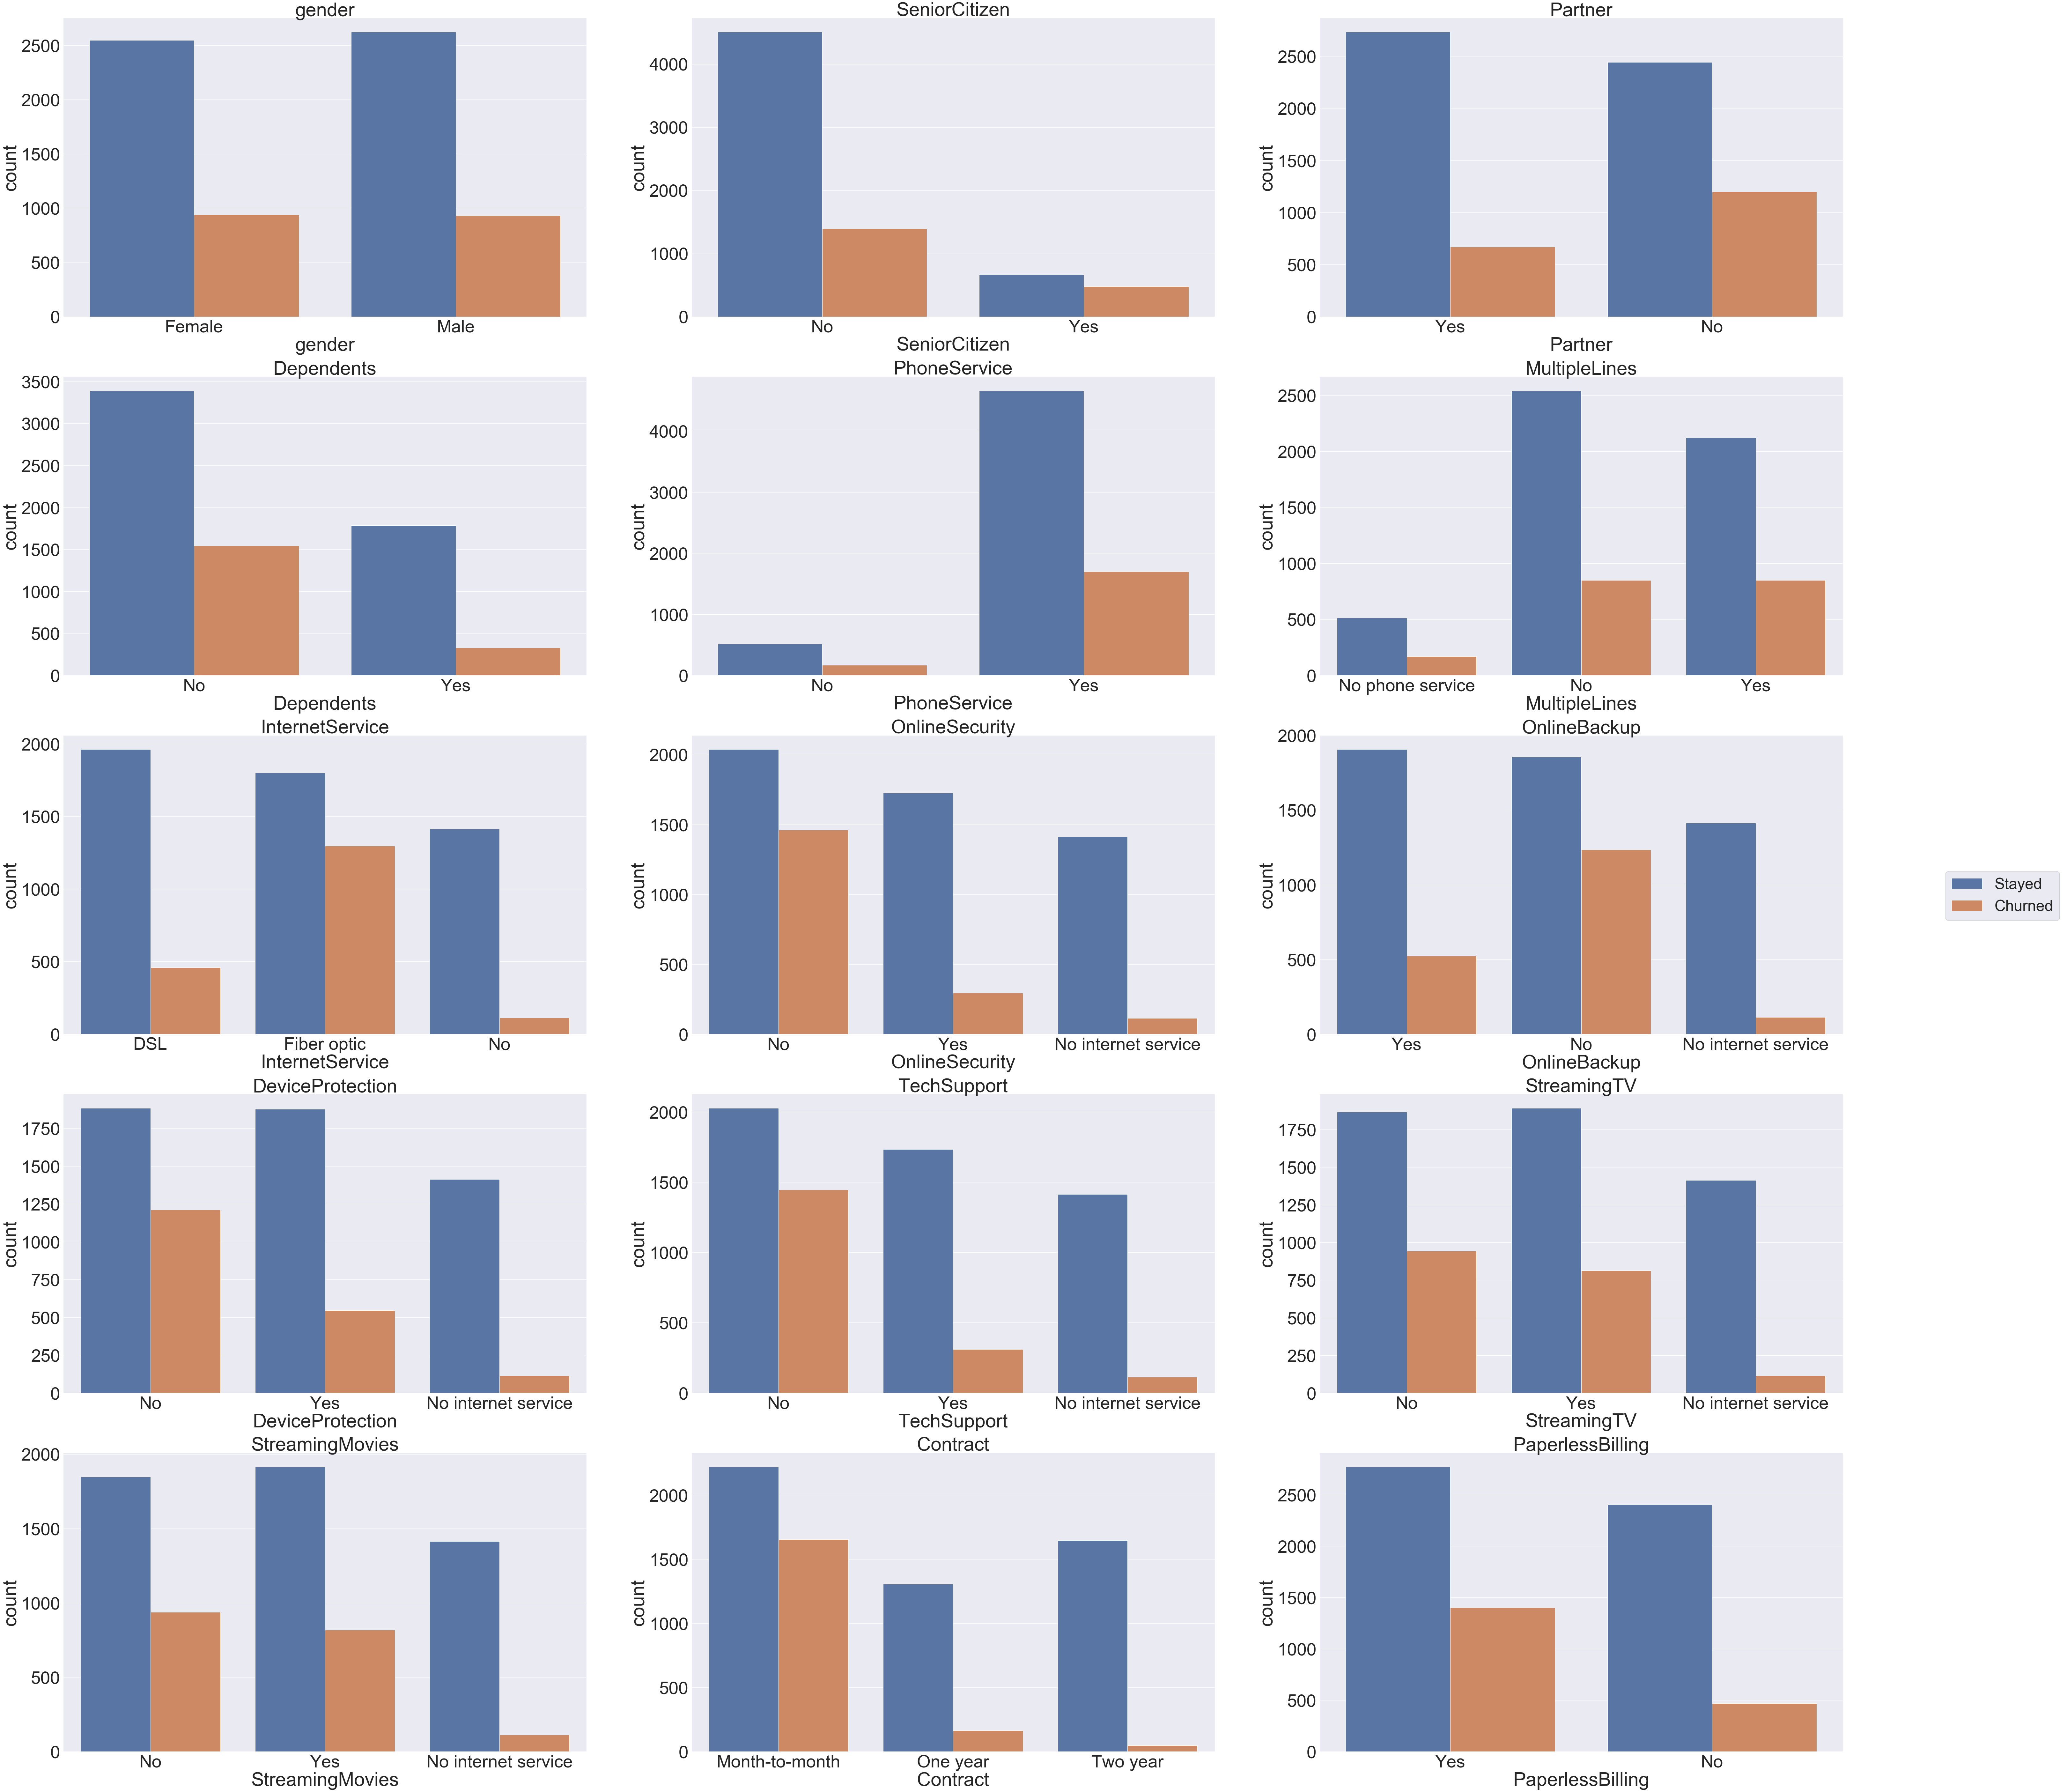

In [162]:
# Step 2: Visualize categorical variables

# Making it visible
plt.rcParams["axes.labelsize"] = 5
sns.set(font_scale=5) 

# Axes
fig, axes = plt.subplots(5, 3, figsize = (100, 100))

for ax, column in zip(axes.flatten(), categorical):
    
    sns.countplot(x = column, 
                  hue =  'Churn', 
                  data = telco,
                  ax = ax)
    
    ax.set_title(column)

    # Improve legends
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='right', fontsize = 48)
    ax.get_legend().remove()

In [152]:
# Observation 1: Gender has 50-50 split and no impact and is uncorrelated to other variables - remove
# Observation 2: Internet Service seems predictive of churn with alot of fiber optic customers leaving 
# Observation 3: OnlinBackup - DeviceProtction - TechSupport - OnlineSecurity imply stickier segment

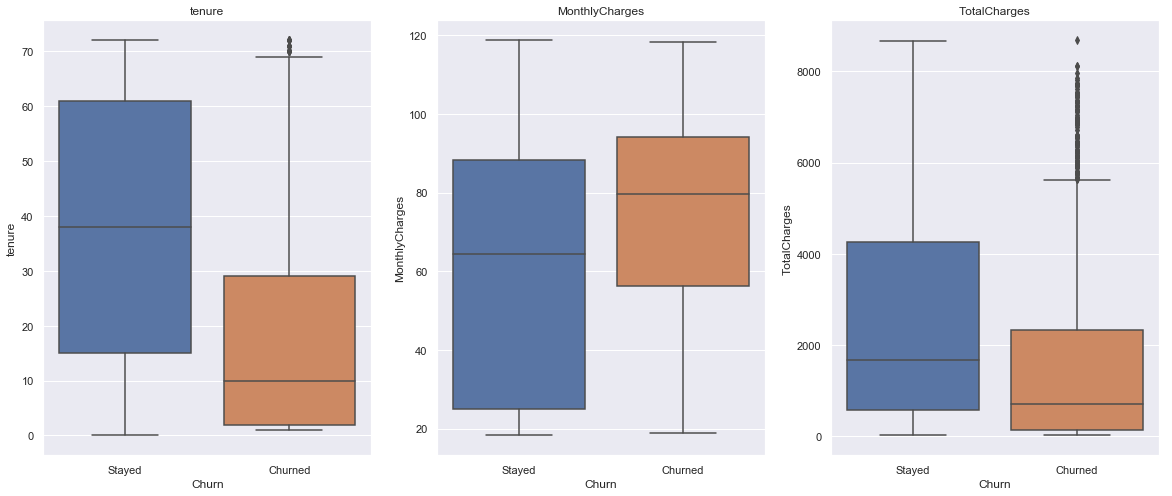

In [61]:
# Step 3: Visualize numeric variables

# Making it visible
plt.rcParams["axes.labelsize"] = 1
sns.set(font_scale=1) 

# Axes
fig, axes = plt.subplots(1, 3, figsize = (20, 8))

for ax, column in zip(axes.flatten(), numeric):
    
    sns.boxplot(x = "Churn", y = column, data = telco, ax = ax)
    
    ax.set_title(column)

In [ ]:
# Observation 1: Monthly and total charges seem to be correlated with churners

## 4. Data pre-processing for machine learning

In [ ]:
# A note on data leakgage
# step 1: split train-test, fit on train, transform on test
# step 2: convert categortical columns to numeric by making dummy values
# step 3: standardize numeric columns 

In [9]:
# Split data
from sklearn.model_selection import train_test_split

In [22]:
# Split data between X and label
X = telco[features]
y = telco['Churn'].replace({'Stayed': 0, 'Churned':1})

In [23]:
# Split train and test
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size = 0.25, random_state=123)

In [24]:
# Initialize StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(train_X[numeric])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
# Transform training and test data
train_numeric_transform = scaler.transform(train_X[numeric])
test_numeric_transform = scaler.transform(test_X[numeric])

In [26]:
# Replace
train_X[numeric] = train_numeric_transform
test_X[numeric] = test_numeric_transform

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [27]:
# One hot encode cat variables
train_X = pd.get_dummies(train_X, columns = categorical,  drop_first = True)
test_X = pd.get_dummies(test_X, columns = categorical,  drop_first = True)

In [453]:
## Feature Engineering

In [28]:
# Re-add Churned to add to train and test
train_X['Churned'] = train_Y
test_X['Churned'] = test_Y

In [464]:
# Calculate correlation
train_X.corr()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,in_ecosystem,Churned
tenure,1.000000,0.241089,0.824414,0.008001,0.015180,0.394814,0.167782,-0.002151,0.002151,0.319747,0.014495,-0.037138,-0.037138,0.324880,-0.037138,0.364916,-0.037138,0.362933,-0.037138,0.314267,-0.037138,0.271030,-0.037138,0.288320,0.203934,0.561748,0.011563,0.232857,-0.203370,-0.230890,0.452761,-0.356656
MonthlyCharges,0.241089,1.000000,0.648327,-0.006688,0.230101,0.105168,-0.113281,0.242720,-0.242720,0.486477,0.789010,-0.764991,-0.764991,0.291357,-0.764991,0.442228,-0.764991,0.474461,-0.764991,0.331351,-0.764991,0.624522,-0.764991,0.626265,0.006212,-0.080215,0.351420,0.029646,0.281206,-0.380422,0.473492,0.194527
TotalCharges,0.824414,0.648327,1.000000,0.010103,0.106355,0.334061,0.069939,0.106005,-0.106005,0.457607,0.359961,-0.376498,-0.376498,0.409336,-0.376498,0.512781,-0.376498,0.521161,-0.376498,0.423195,-0.376498,0.506363,-0.376498,0.521113,0.171757,0.356002,0.162496,0.182470,-0.052732,-0.296041,0.596868,-0.202814
gender_Male,0.008001,-0.006688,0.010103,1.000000,0.004184,-0.002565,0.015596,-0.004968,0.004968,-0.000436,-0.012799,-0.001925,-0.001925,-0.008746,-0.001925,-0.006084,-0.001925,0.007108,-0.001925,-0.001205,-0.001925,-0.002415,-0.001925,-0.000901,0.007438,0.007556,-0.004668,-0.003302,0.005200,0.012373,0.009492,-0.007872
SeniorCitizen_Yes,0.015180,0.230101,0.106355,0.004184,1.000000,0.011393,-0.204614,0.028552,-0.028552,0.151243,0.264741,-0.182672,-0.182672,-0.041316,-0.182672,0.054439,-0.182672,0.067306,-0.182672,-0.061710,-0.182672,0.109425,-0.182672,0.122691,-0.039533,-0.124536,0.161462,-0.040767,0.181758,-0.150109,0.001264,0.152691
Partner_Yes,0.394814,0.105168,0.334061,-0.002565,0.011393,1.000000,0.451315,0.023498,-0.023498,0.147685,-0.000389,-0.002484,-0.002484,0.154771,-0.002484,0.161542,-0.002484,0.156585,-0.002484,0.132604,-0.002484,0.126704,-0.002484,0.126595,0.078175,0.258963,-0.006589,0.075324,-0.080848,-0.099059,0.206635,-0.159016
Dependents_Yes,0.167782,-0.113281,0.069939,0.015596,-0.204614,0.451315,1.000000,-0.000534,0.000534,-0.014340,-0.166196,0.142191,0.142191,0.075042,0.142191,0.029689,0.142191,0.018539,0.142191,0.058918,0.142191,-0.015441,0.142191,-0.034735,0.069603,0.207816,-0.110398,0.068932,-0.146222,0.058975,0.070806,-0.164017
PhoneService_Yes,-0.002151,0.242720,0.106005,-0.004968,0.028552,0.023498,-0.000534,1.000000,-1.000000,0.277729,0.287769,0.170484,0.170484,-0.096001,0.170484,-0.054563,0.170484,-0.082708,0.170484,-0.106221,0.170484,-0.028864,0.170484,-0.037415,-0.007229,-0.010511,0.025867,0.004054,0.002451,-0.009587,-0.103817,0.020177
MultipleLines_No phone service,0.002151,-0.242720,-0.106005,0.004968,-0.028552,-0.023498,0.000534,-1.000000,1.000000,-0.277729,-0.287769,-0.170484,-0.170484,0.096001,-0.170484,0.054563,-0.170484,0.082708,-0.170484,0.106221,-0.170484,0.028864,-0.170484,0.037415,0.007229,0.010511,-0.025867,-0.004054,-0.002451,0.009587,0.103817,-0.020177
MultipleLines_Yes,0.319747,0.486477,0.457607,-0.000436,0.151243,0.147685,-0.014340,0.277729,-0.277729,1.000000,0.367426,-0.209501,-0.209501,0.088716,-0.209501,0.196650,-0.209501,0.189963,-0.209501,0.093681,-0.209501,0.246498,-0.209501,0.253793,-0.006340,0.102227,0.163119,0.055316,0.089183,-0.228135,0.161555,0.049272


In [ ]:
# Visualize 
plt.figure(figsize = (15,10))
sns.heatmap(train_X.corr())

In [466]:
# asgfasga
train_X.corr()['Churned'].sort_values(ascending = False)

Churned                                  1.000000
InternetService_Fiber optic              0.307614
PaymentMethod_Electronic check           0.296696
MonthlyCharges                           0.194527
PaperlessBilling_Yes                     0.181152
SeniorCitizen_Yes                        0.152691
StreamingTV_Yes                          0.071760
StreamingMovies_Yes                      0.057636
MultipleLines_Yes                        0.049272
PhoneService_Yes                         0.020177
gender_Male                             -0.007872
MultipleLines_No phone service          -0.020177
DeviceProtection_Yes                    -0.061854
PaymentMethod_Mailed check              -0.086901
OnlineBackup_Yes                        -0.092987
PaymentMethod_Credit card (automatic)   -0.137808
TechSupport_Yes                         -0.158275
Partner_Yes                             -0.159016
Dependents_Yes                          -0.164017
Contract_One year                       -0.175873


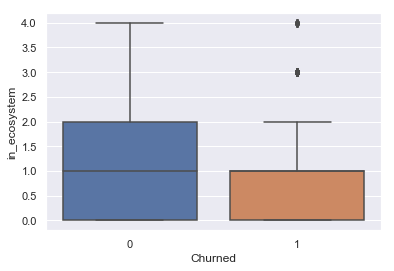

In [29]:
# Visualize boxplot
train_X['in_ecosystem'] = train_X[['OnlineSecurity_Yes', 'OnlineBackup_Yes', 
                                   'DeviceProtection_Yes', 'TechSupport_Yes']].sum(axis = 1)

# etc
plt.rcParams["axes.labelsize"] = 1
sns.set(font_scale=1)

# Create boxplot
sns.boxplot('Churned', 'in_ecosystem', data = train_X)

In [30]:
# Create this
train_X['in_ecosystem'] = np.where(train_X['in_ecosystem'] >= 2, 1 , 0)

test_X['in_ecosystem'] = test_X[['OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 
'TechSupport_Yes']].sum(axis = 1)

test_X['in_ecosystem'] = np.where(test_X['in_ecosystem'] >= 2, 1 , 0)

In [31]:
train_X.drop('Churned', axis = 1, inplace = True)
test_X.drop('Churned', axis = 1, inplace = True)

# 5. Modeling

In [162]:
# import
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fit logistic regression on training data
log_reg = LogisticRegression(random_state = 123)

# Fit on data
log_reg.fit(train_X, train_Y)

# Create Predictions
pred_test_Y = log_reg.predict(test_X)
pred_train_Y = log_reg.predict(train_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, pred_test_Y)
train_accuracy = accuracy_score(train_Y, pred_train_Y)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy, 4))
print('Train accuracy:', round(train_accuracy, 4))

Test accuracy: 0.7967
Train accuracy: 0.8076


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [163]:
# Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Fit logistic regression on training data
dec_tree = DecisionTreeClassifier(random_state = 123)
rand_forest = RandomForestClassifier(random_state = 123)

# Fit on data
dec_tree.fit(train_X, train_Y)
rand_forest.fit(train_X, train_Y)


# Create Predictions
pred_test_Y_tree = dec_tree.predict(test_X)
pred_train_Y_tree = dec_tree.predict(train_X)

pred_test_Y_forest = rand_forest.predict(test_X)
pred_train_Y_forest = rand_forest.predict(train_X)

# Calculate accuracy score on testing data
test_accuracy_tree = accuracy_score(test_Y, pred_test_Y_tree)
train_accuracy_tree = accuracy_score(train_Y, pred_train_Y_tree)

test_accuracy_forest = accuracy_score(test_Y, pred_test_Y_forest)
train_accuracy_forest = accuracy_score(train_Y, pred_train_Y_forest)

# Print test accuracy score rounded to 4 decimals
print('Tree test accuracy:', round(test_accuracy_tree, 4))
print('Tree train accuracy:', round(train_accuracy_tree, 4))

# Print test accuracy score rounded to 4 decimals
print('\nForest test accuracy:', round(test_accuracy_forest, 4))
print('Forest train accuracy:', round(train_accuracy_forest, 4))

Tree test accuracy: 0.7178
Tree train accuracy: 0.9977

Forest test accuracy: 0.7706
Forest train accuracy: 0.9822


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [204]:
# Cross Validation 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Calculate Cross Validation Scores
dec_tree = DecisionTreeClassifier(random_state = 123)
cv_scores = cross_val_score(dec_tree, train_X, train_Y, cv = 10)

# Fit on training data
dec_tree.fit(train_X, train_Y)
y_pred = dec_tree.predict(test_X)

# Fit on data
print(cv_scores)
print("\nMean cross-val score:", round(np.mean(cv_scores), 4))
print("\nTest score:", round(accuracy_score(y_pred, test_Y), 4))

[0.73345936 0.70888469 0.74621212 0.74242424 0.71969697 0.75189394
 0.74621212 0.73863636 0.70833333 0.73863636]

Mean cross-val score: 0.7334

Test score: 0.7178


In [210]:
# Discussion of classification report 

In [211]:
# Hyper parameter tuning 
dec_tree.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 123,
 'splitter': 'best'}

In [213]:
# hyper parameter tuning 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score

# decision tree
dec_tree = DecisionTreeClassifier(random_state = 123,
                                  max_depth = 4)

cv_scores = cross_val_score(dec_tree, train_X, train_Y, cv = 10)

# Fit on training data
dec_tree.fit(train_X, train_Y)
y_pred = dec_tree.predict(test_X)

# Fit on data
print(cv_scores)
print("\nMean cross-val score:", round(np.mean(cv_scores), 4))
print("\nTest score:", round(accuracy_score(y_pred, test_Y), 4))

[0.80151229 0.79584121 0.80681818 0.79545455 0.78787879 0.78030303
 0.8030303  0.79545455 0.75757576 0.80681818]

Mean cross-val score: 0.7931

Test score: 0.7729


In [214]:
# hyper parameter tuning 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score

# decision tree
dec_tree = DecisionTreeClassifier(random_state = 123,
                                  max_depth = 4,
                                  max_features = 25)

cv_scores = cross_val_score(dec_tree, train_X, train_Y, cv = 10)

# Fit on training data
dec_tree.fit(train_X, train_Y)
y_pred = dec_tree.predict(test_X)

# Fit on data
print(cv_scores)
print("\nMean cross-val score:", round(np.mean(cv_scores), 4))
print("\nTest score:", round(accuracy_score(y_pred, test_Y), 4))

[0.80529301 0.79962193 0.82954545 0.79545455 0.78977273 0.78219697
 0.8030303  0.79545455 0.76136364 0.79924242]

Mean cross-val score: 0.7961

Test score: 0.7746


In [215]:
# hyper parameter tuning 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score

# decision tree
dec_tree = DecisionTreeClassifier(random_state = 123,
                                  max_depth = 4,
                                  max_features = 20,
                                  min_samples_split = 40)

cv_scores = cross_val_score(dec_tree, train_X, train_Y, cv = 10)

# Fit on training data
dec_tree.fit(train_X, train_Y)
y_pred = dec_tree.predict(test_X)

# Fit on data
print(cv_scores)
print("\nMean cross-val score:", round(np.mean(cv_scores), 4))
print("\nTest score:", round(accuracy_score(y_pred, test_Y), 4))

[0.80718336 0.7826087  0.81439394 0.80681818 0.78409091 0.78219697
 0.79356061 0.80871212 0.75757576 0.81060606]

Mean cross-val score: 0.7948

Test score: 0.7729


In [216]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [2,4,6,8],
          'max_features': [10,15,20,25],
          'min_samples_split':[20,30,40]}

dec_tree = DecisionTreeClassifier()
clf = GridSearchCV(dec_tree, params, cv = 10, verbose = 2)
clf.fit(train_X, train_Y)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] max_depth=2, max_features=10, min_samples_split=20 ..............
[CV]  max_depth=2, max_features=10, min_samples_split=20, total=   0.0s
[CV] max_depth=2, max_features=10, min_samples_split=20 ..............
[CV]  max_depth=2, max_features=10, min_samples_split=20, total=   0.0s
[CV] max_depth=2, max_features=10, min_samples_split=20 ..............
[CV]  max_depth=2, max_features=10, min_samples_split=20, total=   0.0s
[CV] max_depth=2, max_features=10, min_samples_split=20 ..............
[CV]  max_depth=2, max_features=10, min_samples_split=20, total=   0.0s
[CV] max_depth=2, max_features=10, min_samples_split=20 ..............
[CV]  max_depth=2, max_features=10, min_samples_split=20, total=   0.0s
[CV] max_depth=2, max_features=10, min_samples_split=20 ..............
[CV]  max_depth=2, max_features=10, min_samples_split=20, total=   0.0s
[CV] max_depth=2, max_features=10, min_samples_split=20 ..............
[CV]  ma

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=2, max_features=10, min_samples_split=30, total=   0.0s
[CV] max_depth=2, max_features=10, min_samples_split=30 ..............
[CV]  max_depth=2, max_features=10, min_samples_split=30, total=   0.0s
[CV] max_depth=2, max_features=10, min_samples_split=40 ..............
[CV]  max_depth=2, max_features=10, min_samples_split=40, total=   0.0s
[CV] max_depth=2, max_features=10, min_samples_split=40 ..............
[CV]  max_depth=2, max_features=10, min_samples_split=40, total=   0.0s
[CV] max_depth=2, max_features=10, min_samples_split=40 ..............
[CV]  max_depth=2, max_features=10, min_samples_split=40, total=   0.0s
[CV] max_depth=2, max_features=10, min_samples_split=40 ..............
[CV]  max_depth=2, max_features=10, min_samples_split=40, total=   0.0s
[CV] max_depth=2, max_features=10, min_samples_split=40 ..............
[CV]  max_depth=2, max_features=10, min_samples_split=40, total=   0.0s
[CV] max_depth=2, max_features=10, min_samples_split=40 ..............

[CV]  max_depth=2, max_features=25, min_samples_split=20, total=   0.0s
[CV] max_depth=2, max_features=25, min_samples_split=20 ..............
[CV]  max_depth=2, max_features=25, min_samples_split=20, total=   0.0s
[CV] max_depth=2, max_features=25, min_samples_split=20 ..............
[CV]  max_depth=2, max_features=25, min_samples_split=20, total=   0.0s
[CV] max_depth=2, max_features=25, min_samples_split=20 ..............
[CV]  max_depth=2, max_features=25, min_samples_split=20, total=   0.0s
[CV] max_depth=2, max_features=25, min_samples_split=20 ..............
[CV]  max_depth=2, max_features=25, min_samples_split=20, total=   0.0s
[CV] max_depth=2, max_features=25, min_samples_split=20 ..............
[CV]  max_depth=2, max_features=25, min_samples_split=20, total=   0.0s
[CV] max_depth=2, max_features=25, min_samples_split=20 ..............
[CV]  max_depth=2, max_features=25, min_samples_split=20, total=   0.0s
[CV] max_depth=2, max_features=25, min_samples_split=20 ..............

[CV]  max_depth=4, max_features=15, min_samples_split=30, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_split=30 ..............
[CV]  max_depth=4, max_features=15, min_samples_split=30, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_split=30 ..............
[CV]  max_depth=4, max_features=15, min_samples_split=30, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_split=30 ..............
[CV]  max_depth=4, max_features=15, min_samples_split=30, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_split=30 ..............
[CV]  max_depth=4, max_features=15, min_samples_split=30, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_split=30 ..............
[CV]  max_depth=4, max_features=15, min_samples_split=30, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_split=30 ..............
[CV]  max_depth=4, max_features=15, min_samples_split=30, total=   0.0s
[CV] max_depth=4, max_features=15, min_samples_split=30 ..............

[CV]  max_depth=4, max_features=25, min_samples_split=40, total=   0.0s
[CV] max_depth=4, max_features=25, min_samples_split=40 ..............
[CV]  max_depth=4, max_features=25, min_samples_split=40, total=   0.0s
[CV] max_depth=4, max_features=25, min_samples_split=40 ..............
[CV]  max_depth=4, max_features=25, min_samples_split=40, total=   0.0s
[CV] max_depth=4, max_features=25, min_samples_split=40 ..............
[CV]  max_depth=4, max_features=25, min_samples_split=40, total=   0.0s
[CV] max_depth=4, max_features=25, min_samples_split=40 ..............
[CV]  max_depth=4, max_features=25, min_samples_split=40, total=   0.0s
[CV] max_depth=4, max_features=25, min_samples_split=40 ..............
[CV]  max_depth=4, max_features=25, min_samples_split=40, total=   0.0s
[CV] max_depth=4, max_features=25, min_samples_split=40 ..............
[CV]  max_depth=4, max_features=25, min_samples_split=40, total=   0.0s
[CV] max_depth=4, max_features=25, min_samples_split=40 ..............

[CV]  max_depth=6, max_features=15, min_samples_split=40, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_split=40 ..............
[CV]  max_depth=6, max_features=15, min_samples_split=40, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_split=40 ..............
[CV]  max_depth=6, max_features=15, min_samples_split=40, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_split=40 ..............
[CV]  max_depth=6, max_features=15, min_samples_split=40, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_split=40 ..............
[CV]  max_depth=6, max_features=15, min_samples_split=40, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_split=40 ..............
[CV]  max_depth=6, max_features=15, min_samples_split=40, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_split=40 ..............
[CV]  max_depth=6, max_features=15, min_samples_split=40, total=   0.0s
[CV] max_depth=6, max_features=15, min_samples_split=40 ..............

[CV]  max_depth=6, max_features=25, min_samples_split=40, total=   0.0s
[CV] max_depth=6, max_features=25, min_samples_split=40 ..............
[CV]  max_depth=6, max_features=25, min_samples_split=40, total=   0.0s
[CV] max_depth=6, max_features=25, min_samples_split=40 ..............
[CV]  max_depth=6, max_features=25, min_samples_split=40, total=   0.0s
[CV] max_depth=6, max_features=25, min_samples_split=40 ..............
[CV]  max_depth=6, max_features=25, min_samples_split=40, total=   0.0s
[CV] max_depth=6, max_features=25, min_samples_split=40 ..............
[CV]  max_depth=6, max_features=25, min_samples_split=40, total=   0.0s
[CV] max_depth=6, max_features=25, min_samples_split=40 ..............
[CV]  max_depth=6, max_features=25, min_samples_split=40, total=   0.0s
[CV] max_depth=8, max_features=10, min_samples_split=20 ..............
[CV]  max_depth=8, max_features=10, min_samples_split=20, total=   0.0s
[CV] max_depth=8, max_features=10, min_samples_split=20 ..............

[CV]  max_depth=8, max_features=15, min_samples_split=40, total=   0.0s
[CV] max_depth=8, max_features=15, min_samples_split=40 ..............
[CV]  max_depth=8, max_features=15, min_samples_split=40, total=   0.0s
[CV] max_depth=8, max_features=15, min_samples_split=40 ..............
[CV]  max_depth=8, max_features=15, min_samples_split=40, total=   0.0s
[CV] max_depth=8, max_features=15, min_samples_split=40 ..............
[CV]  max_depth=8, max_features=15, min_samples_split=40, total=   0.0s
[CV] max_depth=8, max_features=15, min_samples_split=40 ..............
[CV]  max_depth=8, max_features=15, min_samples_split=40, total=   0.0s
[CV] max_depth=8, max_features=15, min_samples_split=40 ..............
[CV]  max_depth=8, max_features=15, min_samples_split=40, total=   0.0s
[CV] max_depth=8, max_features=20, min_samples_split=20 ..............
[CV]  max_depth=8, max_features=20, min_samples_split=20, total=   0.0s
[CV] max_depth=8, max_features=20, min_samples_split=20 ..............

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    7.2s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': [10, 15, 20, 25],
                        

In [221]:
# Create predictions
y_pred = clf.predict(test_X)
round(accuracy_score(y_pred, test_Y), 4)

0.7751